In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_crime=pd.read_csv('CRIME LA/Crime_Data_from_2020_to_Present_20250102.csv')

## Understanding and cleaning Data

In [50]:
df_crime.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002


In [51]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003448 entries, 0 to 1003447
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1003448 non-null  int64  
 1   Date Rptd       1003448 non-null  object 
 2   DATE OCC        1003448 non-null  object 
 3   TIME OCC        1003448 non-null  int64  
 4   AREA            1003448 non-null  int64  
 5   AREA NAME       1003448 non-null  object 
 6   Rpt Dist No     1003448 non-null  int64  
 7   Part 1-2        1003448 non-null  int64  
 8   Crm Cd          1003448 non-null  int64  
 9   Crm Cd Desc     1003448 non-null  object 
 10  Mocodes         851881 non-null   object 
 11  Vict Age        1003448 non-null  int64  
 12  Vict Sex        858856 non-null   object 
 13  Vict Descent    858844 non-null   object 
 14  Premis Cd       1003432 non-null  float64
 15  Premis Desc     1002860 non-null  object 
 16  Weapon Used Cd  327140 non-null   fl

In [52]:
#check nulls
df_crime.isna().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151567
Vict Age                0
Vict Sex           144592
Vict Descent       144604
Premis Cd              16
Premis Desc           588
Weapon Used Cd     676308
Weapon Desc        676308
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           934330
Crm Cd 3          1001133
Crm Cd 4          1003384
LOCATION                0
Cross Street       849335
LAT                     0
LON                     0
dtype: int64

In [53]:
# Drop some columns how are so many nulls
df_crime= df_crime.drop(labels=['Mocodes','Weapon Used Cd','Weapon Desc',
                             'Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street'],axis=1)
df_crime.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002


In [54]:
df_crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [61]:
#update datatypes
df_crime['Date Rptd']= pd.to_datetime(df_crime['Date Rptd'],format='mixed') 
df_crime['DATE OCC']=pd.to_datetime(df_crime['DATE OCC'],format='mixed')

In [24]:
df_crime.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                 int64
AREA                     int64
AREA NAME               object
Rpt Dist No              int64
Part 1-2                 int64
Crm Cd                   int64
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Premis Cd              float64
Premis Desc             object
Status                  object
Status Desc             object
Crm Cd 1               float64
LOCATION                object
LAT                    float64
LON                    float64
dtype: object

In [120]:
df_crime['Year']=df_crime['DATE OCC'].dt.year
df_crime['Month']=df_crime['DATE OCC'].dt.month

In [122]:
df_crime.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Year,Month
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,2020,2
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,2020,11


In [30]:


# Function to convert TIME OCC to time format
def convert_time_occ(time_occ):
    time_occ = str(int(time_occ)).zfill(4)  # Ensure it's 4 digits (e.g., '2300')
    return pd.to_datetime(time_occ, format='%H%M').time()  # Convert to time object

# Apply the conversion to the TIME OCC column
df_crime['TIME OCC'] = df_crime['TIME OCC'].apply(convert_time_occ)

# Display the first few rows to confirm
print(df_crime[['TIME OCC']].head(10))


   TIME OCC
0  21:30:00
1  18:00:00
2  17:00:00
3  20:37:00
4  06:30:00
5  18:00:00
6  13:40:00
7  12:10:00
8  20:30:00
9  23:00:00


In [34]:
df_crime.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Year,Month
0,190326475,2020-03-01,2020-03-01,21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3
1,200106753,2020-02-09,2020-02-08,18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,2020,2
2,200320258,2020-11-11,2020-11-04,17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,2020,11


### Statistical description

In [37]:
df_crime.describe(include=['float64','int64'])

,DR_NO,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON
count,1.003448e+06,1.003448e+06,1.003448e+06,1.003448e+06,1.003448e+06,1.003448e+06,1.003432e+06,1.003437e+06,1.003448e+06,1.003448e+06
mean,2.201855e+08,1.069201e+01,1.115659e+03,1.400526e+00,5.002210e+02,2.891332e+01,3.055846e+02,4.999812e+02,3.399810e+01,-1.180905e+02
std,1.316963e+07,6.110398e+00,6.111720e+02,4.900053e-01,2.053109e+02,2.199538e+01,2.193049e+02,2.051113e+02,1.611942e+00,5.586665e+00
min,8.170000e+02,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,1.100000e+02,0.000000e+00,-1.186676e+02
25%,2.106163e+08,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,3.310000e+02,3.401470e+01,-1.184305e+02
50%,2.209148e+08,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,4.420000e+02,3.405890e+01,-1.183225e+02
75%,2.311086e+08,1.600000e+01,1.613250e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,6.260000e+02,3.416490e+01,-1.182739e+02
max,2.499289e+08,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,9.560000e+02,3.433430e+01,0.000000e+00


In [39]:
df_crime['Vict Age'].value_counts()

Vict Age
 0      268921
 30      22249
 35      21773
 31      21385
 29      21310
         ...  
 98         71
-2          28
-3           5
-4           3
 120         1
Name: count, Length: 104, dtype: int64

In [41]:
df_age=df_crime[df_crime['Vict Age']>0] # Remove (0) values and negative values in column Vict Age
df_crime=df_age
df_crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Year,Month
1,200106753,2020-02-09,2020-02-08,18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,2020,2
2,200320258,2020-11-11,2020-11-04,17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,2020,11
3,200907217,2023-05-10,2020-03-10,20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,2020,3
11,200406391,2020-03-02,2020-03-01,14:30:00,4,Hollenbeck,407,1,310,BURGLARY,...,221.0,PUBLIC STORAGE,IC,Invest Cont,310.0,4500 HUNTINGTON DR,34.0881,-118.1877,2020,3
19,200606074,2020-02-12,2020-02-07,16:15:00,6,Hollywood,646,2,805,PIMPING,...,101.0,STREET,AA,Adult Arrest,805.0,HOLLYWOOD,34.1016,-118.3370,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003440,240119644,2024-10-04,2024-09-27,23:45:00,1,Central,142,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,440.0,W 3RD,34.0531,-118.2512,2024,9
1003441,242011172,2024-08-20,2024-08-17,23:00:00,20,Olympic,2033,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,207.0,BAR/COCKTAIL/NIGHTCLUB,IC,Invest Cont,341.0,3700 WILSHIRE BL,34.0617,-118.3066,2024,8
1003442,241414280,2024-10-16,2024-10-16,15:46:00,14,Pacific,1489,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,223.0,VIDEO RENTAL STORE,IC,Invest Cont,341.0,5200 W 98TH ST,33.9469,-118.3703,2024,10
1003445,240410786,2024-10-14,2024-10-11,23:30:00,4,Hollenbeck,421,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,210.0,RESTAURANT/FAST FOOD,IC,Invest Cont,341.0,1700 ALBION ST,34.0675,-118.2240,2024,10


In [43]:
df_crime.describe(include=['float64','int64'])

,DR_NO,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON
count,7.343920e+05,734392.000000,734392.000000,734392.000000,734392.000000,734392.000000,734391.000000,734386.000000,734392.000000,734392.000000
mean,2.195457e+08,10.694945,1115.927157,1.477588,497.566904,39.506422,335.177190,497.262584,33.997252,-118.084553
std,1.287720e+07,6.165128,616.344058,0.499498,220.612894,15.573700,217.193261,220.373757,1.637437,5.675513
min,1.030447e+07,1.000000,101.000000,1.000000,110.000000,2.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.106052e+08,5.000000,587.000000,1.000000,330.000000,28.000000,104.000000,330.000000,34.015500,-118.433500
50%,2.208042e+08,11.000000,1135.000000,1.000000,440.000000,37.000000,404.000000,440.000000,34.059200,-118.326500
75%,2.309058e+08,16.000000,1623.000000,2.000000,626.000000,50.000000,502.000000,626.000000,34.166400,-118.276000
max,2.499289e+08,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000


In [45]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734392 entries, 1 to 1003446
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         734392 non-null  int64         
 1   Date Rptd     734392 non-null  datetime64[ns]
 2   DATE OCC      734392 non-null  datetime64[ns]
 3   TIME OCC      734392 non-null  object        
 4   AREA          734392 non-null  int64         
 5   AREA NAME     734392 non-null  object        
 6   Rpt Dist No   734392 non-null  int64         
 7   Part 1-2      734392 non-null  int64         
 8   Crm Cd        734392 non-null  int64         
 9   Crm Cd Desc   734392 non-null  object        
 10  Vict Age      734392 non-null  int64         
 11  Vict Sex      734360 non-null  object        
 12  Vict Descent  734360 non-null  object        
 13  Premis Cd     734391 non-null  float64       
 14  Premis Desc   734163 non-null  object        
 15  Status        734392 

## Feature Understanding & Analysis

### Crimes per month

In [157]:
df_crime_month=df_crime['Month'].value_counts().sort_index()
df_crime_month.sort_index().reset_index()

,Month,count
0,1,92667
1,2,86351
2,3,87789
3,4,83510
4,5,83009
5,6,81381
6,7,83947
7,8,83835
8,9,80998
9,10,84110


<Axes: xlabel='Month'>

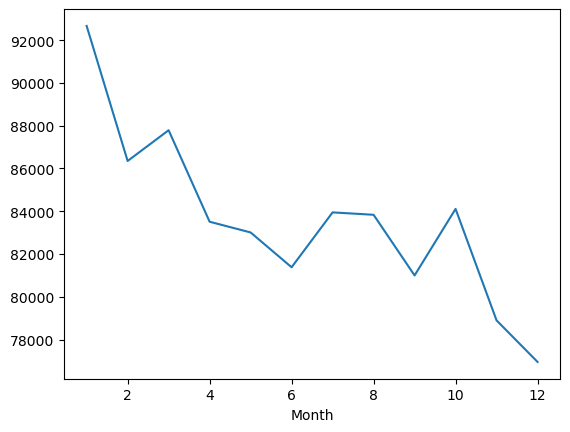

In [159]:
df_crime_month.plot()

### Crimes per Year

In [162]:
df_crime_year=df_crime['Year'].value_counts().sort_index() 
df_crime_year.sort_index().reset_index()

,Year,count
0,2020,199840
1,2021,209860
2,2022,235246
3,2023,232346
4,2024,126156


<Axes: xlabel='Year'>

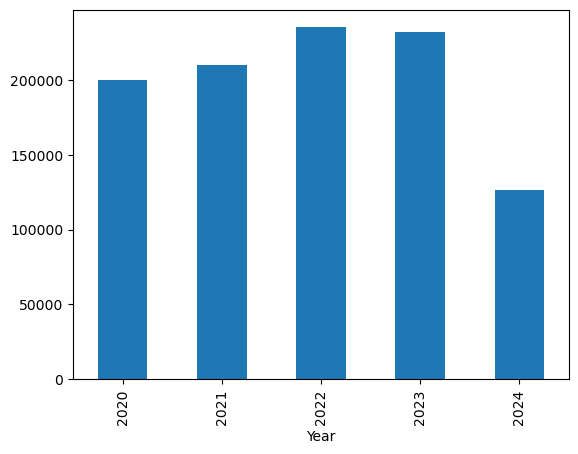

In [164]:
df_crime_year.plot(kind='bar')

### Crime over time

In [166]:
df_crime.groupby(['Year','Month']).size().sort_index().reset_index()

,Year,Month,0
0,2020,1,18574
1,2020,2,17284
2,2020,3,16188
3,2020,4,15706
4,2020,5,17230
5,2020,6,17060
6,2020,7,17156
7,2020,8,16900
8,2020,9,15657
9,2020,10,16510


<Axes: xlabel='Year,Month'>

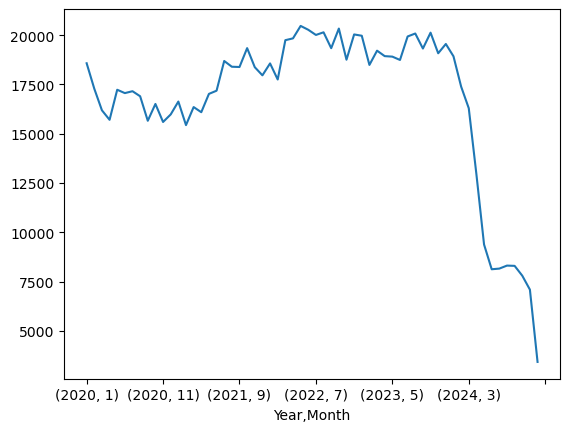

In [172]:
df_over_time=df_crime.groupby(['Year','Month']).size().plot()
df_over_time

### Victims ages

(array([4.48400e+03, 2.10800e+04, 1.13906e+05, 1.66379e+05, 1.40607e+05,
        9.89930e+04, 8.15120e+04, 5.19930e+04, 3.35560e+04, 1.48220e+04,
        5.14500e+03, 1.41700e+03, 4.97000e+02, 0.00000e+00, 1.00000e+00]),
 array([  2.        ,   9.86666667,  17.73333333,  25.6       ,
         33.46666667,  41.33333333,  49.2       ,  57.06666667,
         64.93333333,  72.8       ,  80.66666667,  88.53333333,
         96.4       , 104.26666667, 112.13333333, 120.        ]),
 <BarContainer object of 15 artists>)

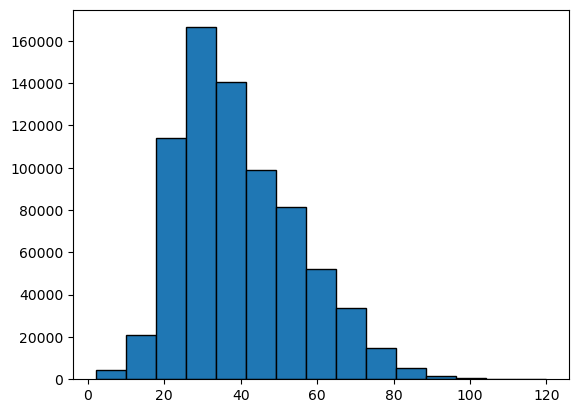

In [177]:
plt.hist(df_age['Vict Age'], edgecolor='black', bins=15)

### 20 Top Crimes per Day

In [180]:
df_crime_per_day=df_crime.groupby(['DATE OCC','Crm Cd Desc']).size()
df_crime_per_day

top_20_crime=df_crime_per_day.groupby('Crm Cd Desc').mean()\
                    .reset_index(name='average_daily_count').sort_values(by='average_daily_count',ascending=False).head(20)
top_20_crime

,Crm Cd Desc,average_daily_count
134,VEHICLE - STOLEN,63.533370
4,BATTERY - SIMPLE ASSAULT,42.874499
21,BURGLARY FROM VEHICLE,34.834251
116,THEFT OF IDENTITY,34.365639
131,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",33.547606
20,BURGLARY,32.901080
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",30.724455
118,THEFT PLAIN - PETTY ($950 & UNDER),29.449339
74,INTIMATE PARTNER - SIMPLE ASSAULT,28.448234
114,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),22.737741


<BarContainer object of 20 artists>

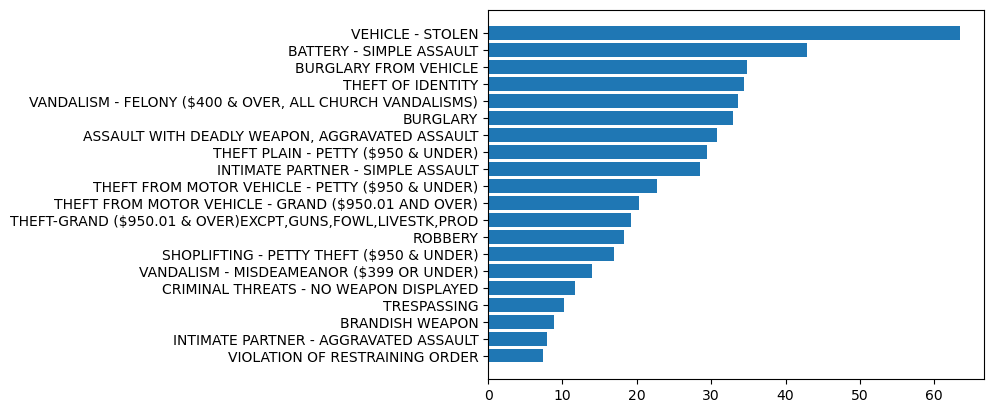

In [182]:
top_20_crime_sorted=top_20_crime.sort_values(by='average_daily_count',ascending=True)
plt.barh(top_20_crime_sorted['Crm Cd Desc'], top_20_crime_sorted['average_daily_count'])

### Dashboard Creation

In [185]:
plt.style.use('ggplot')

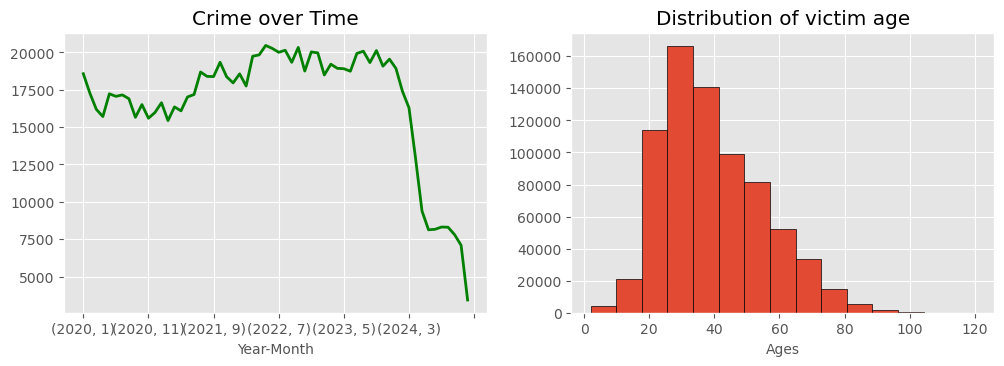

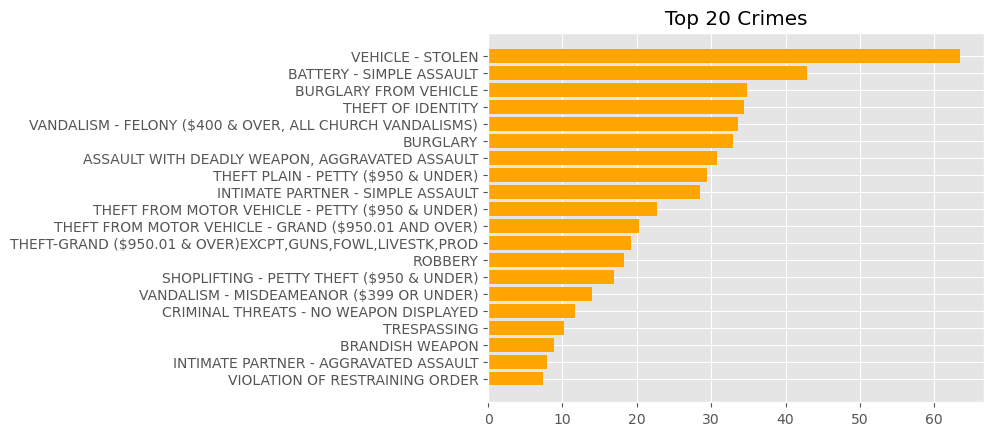

In [187]:
plt.figure(figsize=(12,8))

# Plot 1 line chart
plt.subplot(2,2,1)
crime_plot=df_crime.groupby(['Year','Month']).size().plot(color='green',linewidth=2) 
crime_plot.set_xlabel('Year-Month',fontsize=10)# ici on est obliger de mettre .set_xlabel au lieu de plt.x_label car ici ce n'est pas un plt qui est defini ici c'est pandas qui nous produit le plot
crime_plot.set_title('Crime over Time')

#Plot 2 histogram
plt.subplot(2,2,2)
plt.hist(df_age['Vict Age'], edgecolor='black', bins=15)
plt.xlabel('Ages',fontsize=10)
plt.title('Distribution of victim age')
plt.show()

#plot 3 horizontal bar
plt.figure
plt.barh(top_20_crime_sorted['Crm Cd Desc'], top_20_crime_sorted['average_daily_count'],color='orange')
plt.title('Top 20 Crimes')
plt.show()

### Most common crime per area

In [64]:
most_common_crime = (
    df_crime.groupby(['AREA NAME', 'Crm Cd Desc'])
    .size()
    .reset_index(name='Count common')
    .sort_values(['AREA NAME', 'Count common'], ascending=[True, False])
    .drop_duplicates(subset=['AREA NAME'])
)

In [66]:
most_common_crime

,AREA NAME,Crm Cd Desc,Count common
113,77th Street,VEHICLE - STOLEN,8766
137,Central,BURGLARY FROM VEHICLE,9637
343,Devonshire,VEHICLE - STOLEN,3959
451,Foothill,VEHICLE - STOLEN,4539
567,Harbor,VEHICLE - STOLEN,6135
678,Hollenbeck,VEHICLE - STOLEN,6213
688,Hollywood,BATTERY - SIMPLE ASSAULT,4484
908,Mission,VEHICLE - STOLEN,6050
1028,N Hollywood,VEHICLE - STOLEN,5107
1144,Newton,VEHICLE - STOLEN,8281


C:\Users\regin\AppData\Local\Temp\ipykernel_7096\3667778800.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


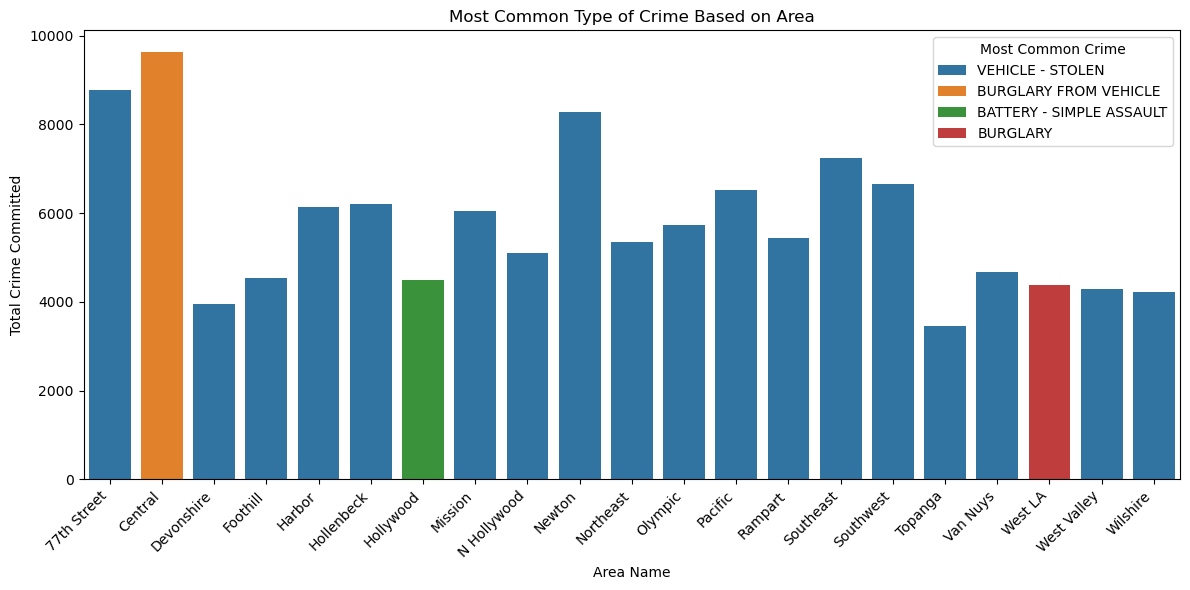

In [70]:
plt.figure(figsize=(12,6))
ax = sns.barplot(most_common_crime,x="AREA NAME",y="Count common", hue="Crm Cd Desc",dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.legend(title="Most Common Crime")
plt.ylabel("Total Crime Committed")
plt.xlabel("Area Name")
plt.title("Most Common Type of Crime Based on Area")
plt.tight_layout()
plt.show()

### How does the time of occurrence ('TIME OCC') relate to the type of crime ('Crm Cd Desc')? Are certain crimes more likely at certain times of day?

In [99]:


# Sample dataset loading (replace this with your actual dataset loading code)
df_LAcrime=pd.read_csv('CRIME LA/LACrime.csv')

# Convert TIME OCC to proper time format
def convert_time_occ(time_occ):
    time_occ = str(int(time_occ)).zfill(4)  # Ensure it's 4 digits (e.g., '300' -> '0300')
    return pd.to_datetime(time_occ, format='%H%M').hour  # Extract hour

df_LAcrime['HOUR OCC'] = df_LAcrime['TIME OCC'].apply(convert_time_occ)

# Categorize time into periods of the day
def categorize_time(hour):
    if 0 <= hour <= 5:
        return 'Night'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

df_LAcrime['Time Period'] = df_LAcrime['HOUR OCC'].apply(categorize_time)

# Group data by crime description and time period
crime_time_analysis = df_LAcrime.groupby(['Time Period', 'Crm Cd Desc']).size().reset_index(name='Count')

# Pivot the data for better visualization
crime_time_pivot = crime_time_analysis.pivot(index='Crm Cd Desc', columns='Time Period', values='Count').fillna(0)





In [146]:
df_crime_time=crime_time_pivot.head(30)
df_crime_time

Time Period,Afternoon,Evening,Morning,Night
Crm Cd Desc,,,,
ARSON,315.0,394.0,280.0,474.0
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,62.0,112.0,31.0,54.0
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",15642.0,17525.0,9267.0,9061.0
ATTEMPTED ROBBERY,1285.0,1418.0,785.0,720.0
BATTERY - SIMPLE ASSAULT,26435.0,22791.0,16077.0,8572.0
BATTERY ON A FIREFIGHTER,46.0,72.0,38.0,17.0
BATTERY POLICE (SIMPLE),206.0,211.0,171.0,114.0
BATTERY WITH SEXUAL CONTACT,1494.0,1070.0,895.0,664.0
"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",2.0,1.0,1.0,0.0


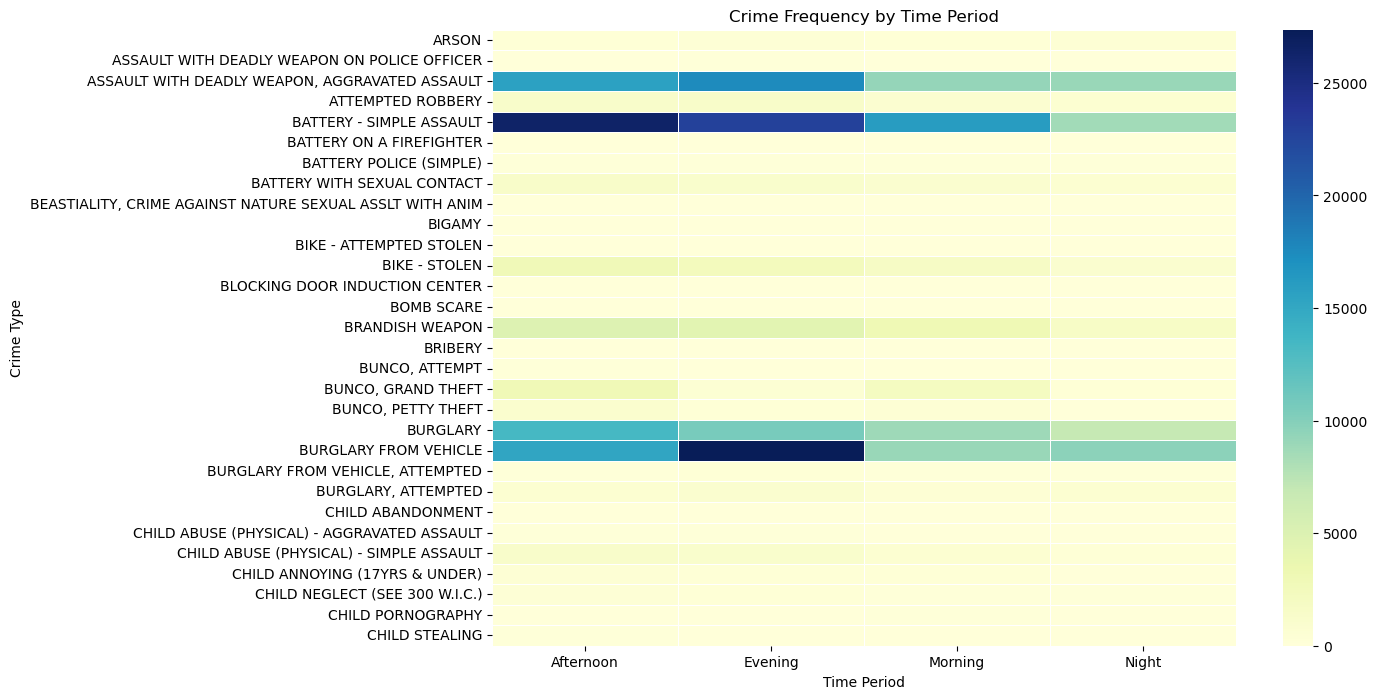

In [148]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_crime_time, cmap="YlGnBu", linewidths=.5)
plt.title('Crime Frequency by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Crime Type')
plt.show()

### What is the average age ('Vict Age') of victims for each type of crime ('Crm Cd Desc')?

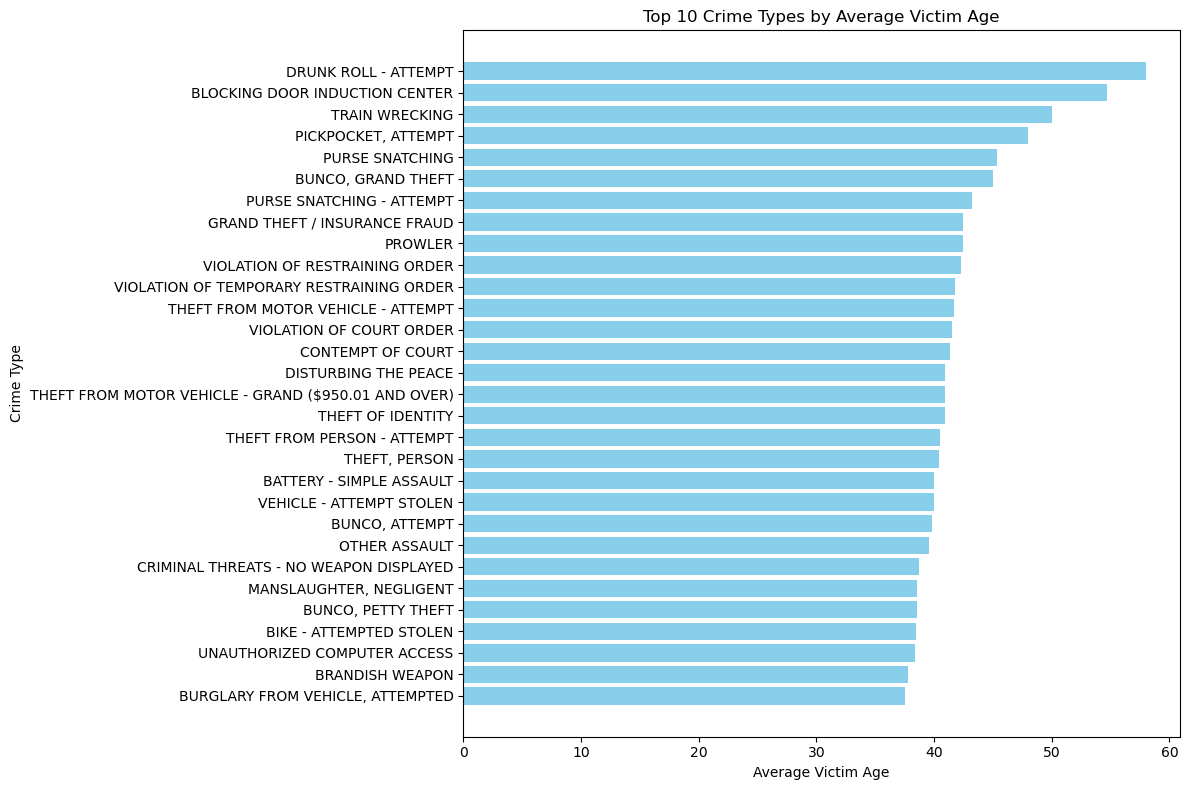

In [154]:


# Calculate the average age of victims for each type of crime
average_age_by_crime = df_crime.groupby('Crm Cd Desc')['Vict Age'].mean().reset_index()

# Rename columns for clarity
average_age_by_crime.columns = ['Crime Type', 'Average Victim Age']

# Sort by average victim age in descending order for better insights
average_age_by_crime = average_age_by_crime.sort_values(by='Average Victim Age', ascending=False)

# Visualization: Plot a bar chart of the top 10 crimes by average victim age
plt.figure(figsize=(12, 8))
top_crimes = average_age_by_crime.head(30)
plt.barh(top_crimes['Crime Type'], top_crimes['Average Victim Age'], color='skyblue')
plt.xlabel('Average Victim Age')
plt.ylabel('Crime Type')
plt.title('Top 10 Crime Types by Average Victim Age')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()
plt.show()


### Are men, women, or non-binary individuals ('Vict Sex') more likely to be victims of certain types of 

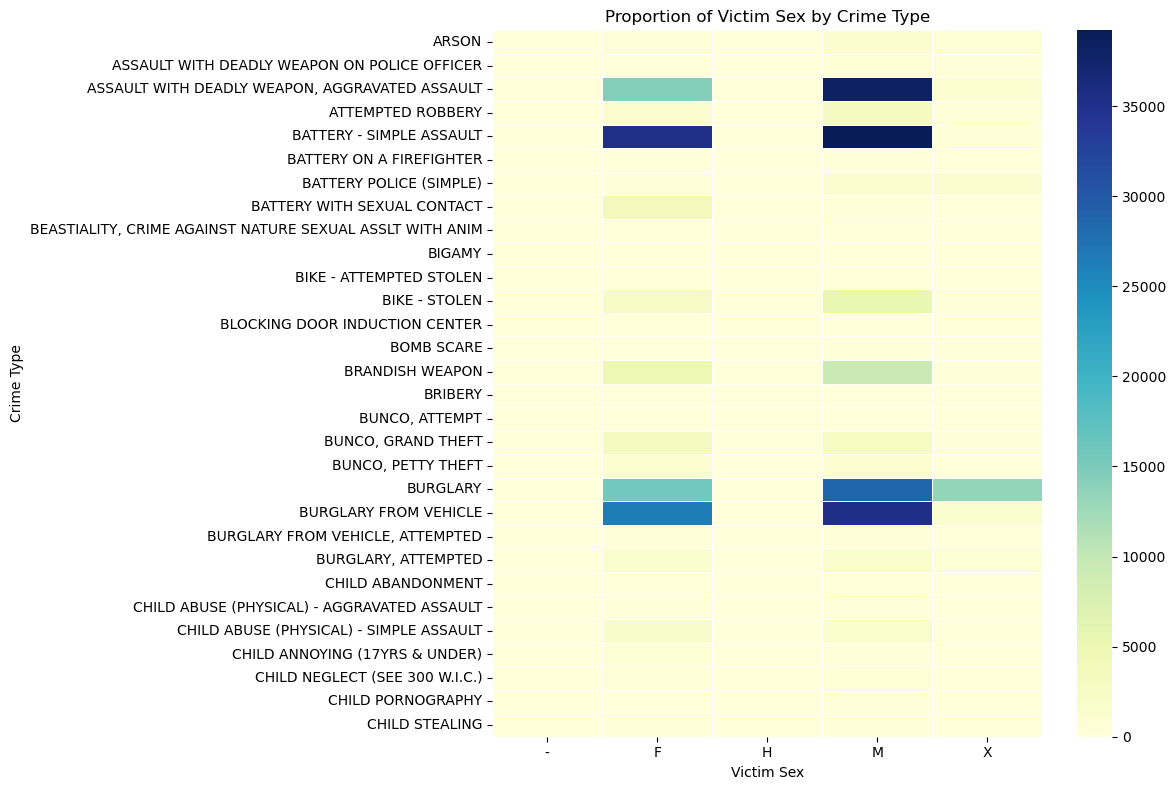

In [150]:
# Calculate the count of victims by sex for each type of crime
victim_sex_crime = df_crime.groupby(['Crm Cd Desc', 'Vict Sex']).size().reset_index(name='Count')

# Pivot the data for visualization
victim_sex_crime_pivot = victim_sex_crime.pivot(index='Crm Cd Desc', columns='Vict Sex', values='Count').fillna(0)
Victime_sexe=victim_sex_crime_pivot.head(30)

# Visualization: Heatmap of victim sex proportions by crime type
plt.figure(figsize=(12, 8))
sns.heatmap(Victime_sexe, cmap="YlGnBu", linewidths=0.5, annot=False)
plt.title('Proportion of Victim Sex by Crime Type')
plt.xlabel('Victim Sex')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()


### Are certain crimes more likely to happen at certain times of the year?

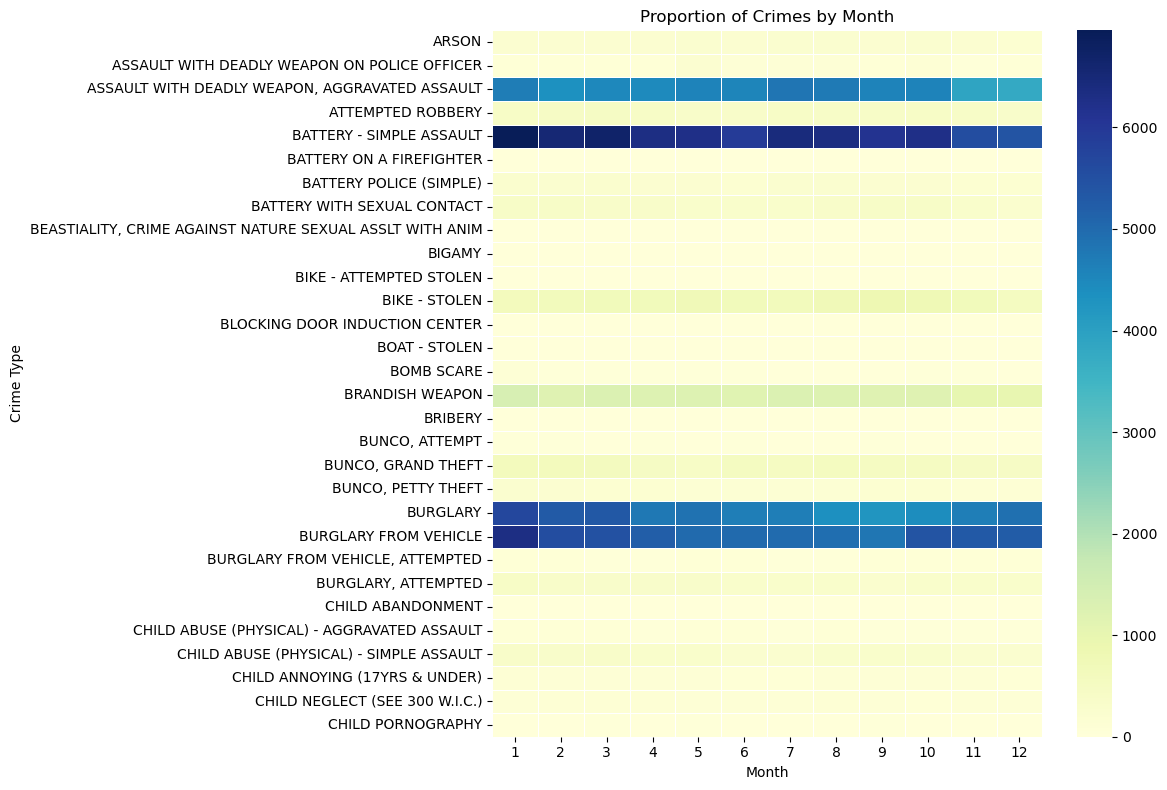

In [152]:
# Group data by crime type and month to see frequency
crime_by_month = df_crime.groupby(['Crm Cd Desc', 'Month']).size().reset_index(name='Count')

# Pivot the data for better visualization
crime_by_month_pivot = crime_by_month.pivot(index='Crm Cd Desc', columns='Month', values='Count').fillna(0)
crime_month=crime_by_month_pivot.head(30)
# Visualization: Heatmap of crime frequency by month
plt.figure(figsize=(12, 8))
sns.heatmap(crime_month, cmap="YlGnBu", linewidths=0.5, annot=False)
plt.title('Proportion of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()


